```
// logic of https://www.youtube.com/watch?v=A6464U4bPPQ
// Facial Recognition attendance system using python

// camera module
camera module take input ...
python check
if (human face in the frame //// or not){
  compare face with the face from database

  if(present){
    // update in csv file
    // name of the student and time of entry of the student

    ///// next kaj hocche entry er pore 30 second er moddhe jodi same face dekhano hoy .. taile bolbe already counted ..

    //// and 30 second pore jodi abar same face count hoy .. taile ek din er  present complete hobe or something !
  }

}else {
  // or not

}
```

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=9adcd84508e6c2afcaa29bc0113478f1a0a2cc66b50f1a36d29217d48e45c129
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:

!pip install opencv-python
# import opencv-python
# ----------------------------- from yt video www.youtube.com/watch?v=A6464U4bPPQ
import face_recognition as fr
import os
import cv2 # take input from the webcam, process it , give it to face ignition ..
#compare faces

import csv # handle csv file
import numpy as np

from datetime import datetime
#----------------------------- from debajyotikarmaker sir lecture
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tqdm import tqdm


# 1. take input from the webcam - YT Video

In [6]:
video_capture = cv2.VideoCapture(0); #0 as default web cam

In [ ]:
"""
#image and corresponding encoding ...
#make an array of known face encoding ... came from db
known_face_encoding=[]

#make an array of known face names ... came from db
known_face_names=[]

face_locations = [] # face in webcame .. face co-ordinates
face_encodings = [] # the raw data
face_names = [] # the name of the face it is present in database
s = true
"""

# 2. Load All Image from DB - Sir

In [44]:
Data_Path = '/content/drive/MyDrive/CVPR Mohammad Sheakh Image/'
classes = os.listdir(Data_Path) # return list of folder
print(classes)  # in this case it returns all my image
#----------------------------------------------------------------
train_data = []
for label, classes in enumerate(classes) :
  print(f"item, classes :: {label} , { classes}")
  path = os.path.join(Data_Path, classes)
  print(f"path ::  { path}")

  for singleImage in tqdm(os.listdir(path)):
    print(f"Single Image😀 :: 😀 {singleImage}") #  which will print image name
    # plt.imshow(singleImage) #😭
    img_arr = cv2.imread(os.path.join(path, singleImage)) # numpy array
    # plt.imshow(img_arr) # 😀 eta kaj kore .. image show kore
    img_arr = cv2.resize(img_arr, (128, 128)) # shob gula ke ek size e ante hobe ...
    #train_data.append(img_arr)
    # ----------- we need label also /// numeric value
    train_data.append([img_arr, label]) # image er shathe label o rakhtesi

    #break
 #break
print(f"Length of train_data :: {len(train_data)}") # ------------------ this line is working 😀😀😀😀😀😀



['MohammadSheakh', 'Jahid Hassan Mridha', 'Fahim Rahman', 'Rezwan Ahmad']
item, classes :: 0 , MohammadSheakh
path ::  /content/drive/MyDrive/CVPR Mohammad Sheakh Image/MohammadSheakh


  0%|          | 0/10 [00:00<?, ?it/s]

Single Image😀 :: 😀 mohammadsheakh(2).jpg
Single Image😀 :: 😀 mohammadsheakh(4).jpg


 20%|██        | 2/10 [00:00<00:02,  3.76it/s]

Single Image😀 :: 😀 mohammadsheakh.jpg


 30%|███       | 3/10 [00:00<00:02,  3.09it/s]

Single Image😀 :: 😀 mohammadsheakh(9).jpg
Single Image😀 :: 😀 mohammadsheakh(6).jpg
Single Image😀 :: 😀 mohammadsheakh(5).jpg


 60%|██████    | 6/10 [00:01<00:00,  5.77it/s]

Single Image😀 :: 😀 mohammadsheakh(1).jpg


 70%|███████   | 7/10 [00:01<00:00,  4.34it/s]

Single Image😀 :: 😀 mohammadsheakh(8).jpg


 80%|████████  | 8/10 [00:02<00:00,  3.65it/s]

Single Image😀 :: 😀 mohammadsheakh(3).jpg
Single Image😀 :: 😀 mohammadsheakh(7).jpg


100%|██████████| 10/10 [00:02<00:00,  4.01it/s]


item, classes :: 1 , Jahid Hassan Mridha
path ::  /content/drive/MyDrive/CVPR Mohammad Sheakh Image/Jahid Hassan Mridha


 40%|████      | 4/10 [00:00<00:00, 37.80it/s]

Single Image😀 :: 😀 Jahid.jpg
Single Image😀 :: 😀 Jahid(9).jpg
Single Image😀 :: 😀 Jahid(1).jpg
Single Image😀 :: 😀 Jahid(5).jpg
Single Image😀 :: 😀 Jahid(6).jpg
Single Image😀 :: 😀 Jahid(7).jpg
Single Image😀 :: 😀 Jahid(2).jpg
Single Image😀 :: 😀 Jahid(3).jpg
Single Image😀 :: 😀 Jahid(4).jpg


100%|██████████| 10/10 [00:00<00:00, 40.42it/s]


Single Image😀 :: 😀 Jahid(8).jpg
item, classes :: 2 , Fahim Rahman
path ::  /content/drive/MyDrive/CVPR Mohammad Sheakh Image/Fahim Rahman


 10%|█         | 1/10 [00:00<00:01,  8.45it/s]

Single Image😀 :: 😀 Fahim Rahman(4).jpg
Single Image😀 :: 😀 Fahim Rahman(6).jpg


 30%|███       | 3/10 [00:00<00:00,  8.00it/s]

Single Image😀 :: 😀 Fahim Rahman(7).jpg
Single Image😀 :: 😀 Fahim Rahman(9).jpg


 50%|█████     | 5/10 [00:00<00:00,  8.38it/s]

Single Image😀 :: 😀 Fahim Rahman(3).jpg
Single Image😀 :: 😀 Fahim Rahman(5).jpg


 70%|███████   | 7/10 [00:00<00:00,  8.21it/s]

Single Image😀 :: 😀 Fahim Rahman(2).jpg
Single Image😀 :: 😀 Fahim Rahman(1).jpg


 90%|█████████ | 9/10 [00:01<00:00,  8.30it/s]

Single Image😀 :: 😀 Fahim Rahman.jpg
Single Image😀 :: 😀 Fahim Rahman(8).jpg


100%|██████████| 10/10 [00:01<00:00,  8.27it/s]


item, classes :: 3 , Rezwan Ahmad
path ::  /content/drive/MyDrive/CVPR Mohammad Sheakh Image/Rezwan Ahmad


 40%|████      | 4/10 [00:00<00:00, 21.78it/s]

Single Image😀 :: 😀 Rezwan(9).jpg
Single Image😀 :: 😀 Rezwan(8).jpg
Single Image😀 :: 😀 Rezwan(4).jpg
Single Image😀 :: 😀 Rezwan(3).jpg
Single Image😀 :: 😀 Rezwan(5).jpg


 70%|███████   | 7/10 [00:00<00:00, 17.26it/s]

Single Image😀 :: 😀 Rezwan(2).jpg
Single Image😀 :: 😀 Rezwan(1).jpg
Single Image😀 :: 😀 Rezwan.jpg


100%|██████████| 10/10 [00:00<00:00, 15.66it/s]

Single Image😀 :: 😀 Rezwan(7).jpg
Single Image😀 :: 😀 Rezwan(6).jpg
Length of train_data :: 40


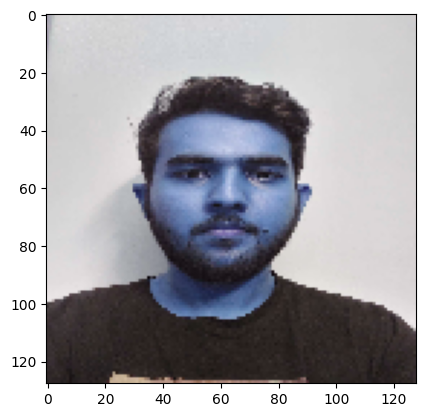

In [14]:
plt.imshow(train_data[39][0]) # dataset read korar jonno  [0][1]

Text(0.5, 0, 'R')

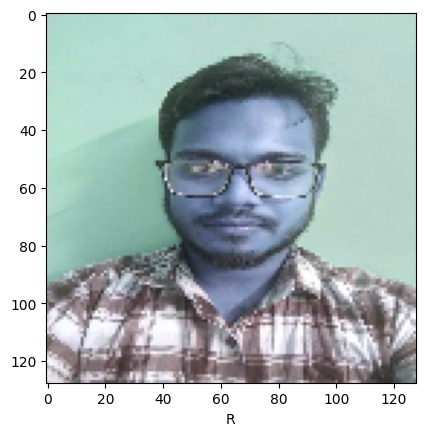

In [30]:
plt.imshow(train_data[19][0]) #------ 😭 [0 to 19][0] ei porjonto e chobi print hoy .. architecture ta bujhi nai 😭
plt.xlabel(classes[train_data[0][1]]) # --- 😭 label thik moto print hocche na
#--plt.xlabel(train_data[0][1])

In [32]:
for i in range(39):
  print(train_data[i][1])  # 0 gula mohammad , 1 gula fahim rahman

0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3


# Data ke shuffle korte hobe  - Sir

In [33]:
random.shuffle(train_data)
print(f"print-> train_data after shuffle : {train_data[0][1]}")
#train_data[1][1]

#-------------------- tensor object / numpy array diye feed korte hobe
#--------------------- image ar label alada korbo
train_imgs = []
train_labels = [] # duita empty array niye nilam

for img, label in train_data :
  train_imgs.append(img)
  train_labels.append(label)


#------------------ normal list theke numpy te convert korbo

train_imgs_np = np.array(train_imgs)
train_labels_np = np.array(train_labels)

#-- lets print the dymention
print(f"print-> train_imgs_np.shape , train_labels_np.shape :: {train_imgs_np.shape} , {train_labels_np.shape}")



print-> train_data after shuffle : 3
print-> train_imgs_np.shape , train_labels_np.shape :: (40, 128, 128, 3) , (40,)


# এবার আমরা CNN দেখবো ... মডেল ক্রিয়েট করবো - Sir

In [ ]:
# 🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉 CURRENTLY WORKING IN THIS PORTION🎉🎉🎉🎉🎉🎉🎉🎉🎉
model = tf.keras.Sequential(
    [
        tf.keras.Input (shape=(128, 128, 3)), # // input bolte hobe .. 3 hocche depth which also means color image Bcz RGB
        # ekhon kichu hidden layer amader ke bolte hobe
        tf.keras.layers.Conv2D(
              filters = 128, # // koto gula filter amra use korbo
              kernel_size = (5,5),  # // kernel_size .. filter er dymention
              activation = 'relu',
              padding = 'same'  # // tensorflow nije calculate korbe .. koto tuku padding dite hobe
            ),

        tf.keras.layers.Conv2D(
              filters = 64, # // koto gula filter amra use korbo
              kernel_size = (5,5),  # // kernel_size .. filter er dymention
              activation = 'relu',
              padding = 'same'  # // tensorflow nije calculate korbe .. koto tuku padding dite hobe
            ),

        tf.keras.layers.Conv2D(
              filters = 32, # // koto gula filter amra use korbo
              kernel_size = (3,3),  # // kernel_size .. filter er dymention
              activation = 'relu',
              padding = 'same'  # // tensorflow nije calculate korbe .. koto tuku padding dite hobe
            ),

        tf.keras.layers.Conv2D(
              filters = 16,
              kernel_size = (3,3),
              activation = 'relu',
            ),

      # dymention কে ছোট করতে চাইলে
      # tf.keras.layers.MaxPooling2D(pool_size = (2,2)), # --------------- 😭😭😭 issue
      #tf.keras.layers.Dense(unit = 3, activation='softmax'),  # --------------- 😭😭😭 issue

      # নেটওয়ারক এর আউটপুট এর  আগে মেট্রিক্স কে ভেক্টর এ কনভার্ট করতে হবে

      tf.keras.layers.Flatten()

      # কত নাম্বার অফ প্যারামিটার  কমে



    ]
)

model.summary() # // model ta kemon holo dekhte chai

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# লেটস ট্রেইন দ্যা মডেল
h = model.fit(
    x = train_imgs_np,
    y = train_labels_np,
    epochs = 100,
    validation_split = 0.2, # 20% chobi validation er jonno use korbe ..
    batch_size = 5 # ek bar e 5 ta kore chobi niye kaj korbe
)




# Plot Graph Based On Accuracy And Loss

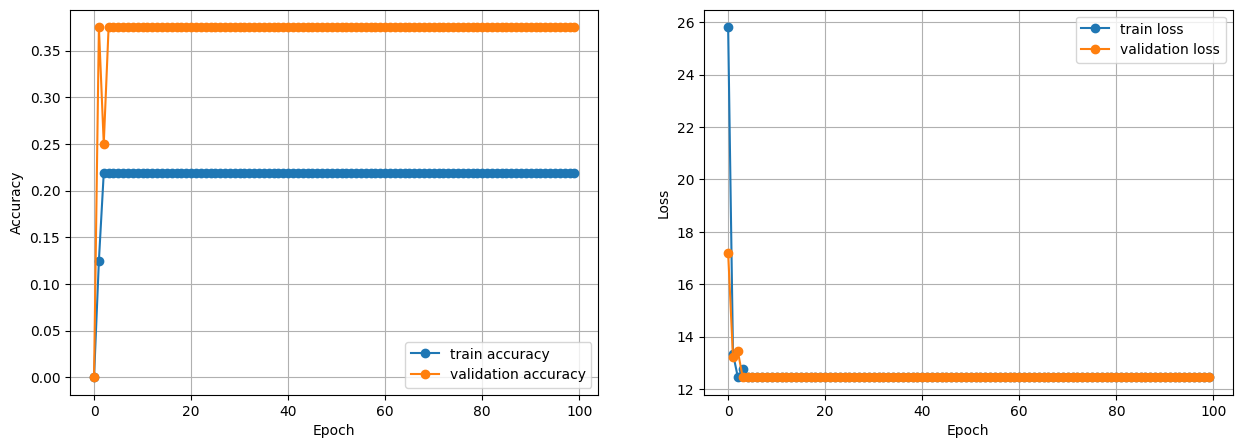

In [39]:
# .. 🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉 CURRENTLY WORKING IN THIS PORTION🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

# Testing Should be done with Open CV

In [45]:
# predictions = model.predict(train_data[19][0])
# np.argmax(predictions[0])

# Open a CSV file and create a writer object class - YT Video

In [ ]:
# before that consider date time year
now = datetime.now()
current_date = now.strftime("%Y-%m-%d")

csvFile = open(current_date + '.csv', 'w+', newline = '')
lnwrite = csv.writer(csvFile) # lnwrite is the instance .. we will use this to write the data in CSV file


# 1.1

In [ ]:
while True :  # infinite loop to open camera
  _ , frame = video_capture.read() # extracting the video data // return signal , actual video input
  small_frame = cv2.resize(frame, (0,0), fx = 0.25, fy = 0.25 ) # decreasing the size of video coming from webcam
  rgb_small_frame = small_frame[:, :, ::-1] # converting to RGB as CV2 takes the input as BGR  format
  if True: # which is 's' in YT video
    face_locations = face_recognition.face_locations(rgb_small_frame)
    face_encodings = face_recognition.face_encodings(rgb_small_grame, face_locations)
    face_names = []
    for face_encoding in face_encodings:
      # here we do the compare stuffs
      break
    break


# lets go back to dev sir's code